In [17]:
import numpy as np
import pandas as pd
import scipy as si
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import os

In [4]:
# The data path of input file
data_path = "./Reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)
pd_data = pd_data[:10000]

type(pd_data)

pandas.core.frame.DataFrame

In [6]:
df = pd_data.groupby(['UserId', 'ProfileName'])['Score'] \
            .count() \
            .reset_index(name='Score count') \
            .sort_values(['Score count'], ascending=False)
mean_df = pd_data.groupby(['UserId', 'ProfileName'])['Score'] \
            .mean() \
            .reset_index(name='Score mean') \
            .sort_values(['Score mean'], ascending=False)
df['Score mean'] = mean_df['Score mean']
df.head(10)

,UserId,ProfileName,Score count,Score mean
2330,A1Z54EM24Y40LL,c2,17,3.882353
4286,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
5169,A35R32TA60XD57,M. Torma,9,4.111111
2919,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
6442,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
6330,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6493,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
8390,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
2826,A26NFIQ7KWI8Y7,kt rose,6,2.666667
31,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


<BarContainer object of 5 artists>

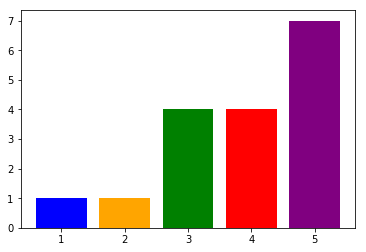

In [7]:
c2_df = pd_data['ProfileName'] == 'c2'
c2_df = pd_data[c2_df]
c2_df = c2_df['Score'].value_counts().reset_index(name = 'Score count').sort_values(['Score count'], ascending=True)
x = [1, 2, 3, 4, 5]
plt.bar(x, c2_df['Score count'], color = ['blue', 'orange', 'green', 'red', 'purple'])

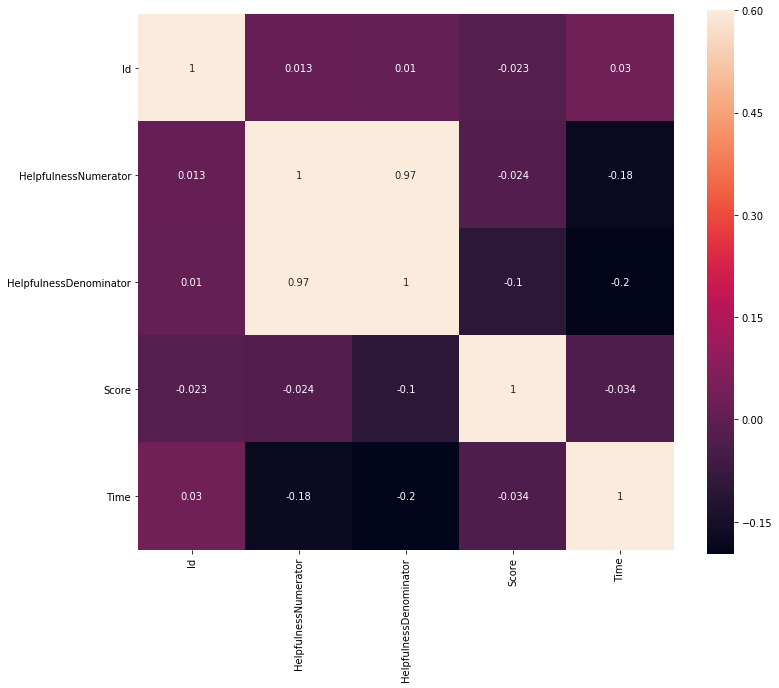

In [8]:
plt.figure(figsize=(12,10))
foo = sns.heatmap(pd_data.drop(['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text'],axis=1).corr(), vmax=0.6, square=True, annot=True)

<BarContainer object of 10 artists>

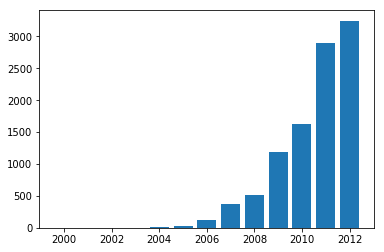

In [256]:
df = pd_data
df['Date'] = pd.to_datetime(pd_data['Time'], unit ='s').sort_values(ascending=True)
df['Date'] = df['Date'].sort_values(ascending = True)
df['Year'] = pd.DatetimeIndex(df['Date']).year
df2 = df.groupby('Year')['Score'].count().reset_index(name='Number of reviews')
plt.bar(df2['Year'], df2['Number of reviews'])


In [ ]:
vote_df = (pd_data['HelpfulnessNumerator'] <= pd_data['HelpfulnessDenominator'])
vote_df = pd_data[vote_df]
vote_df = vote_df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'Score', 'Time', 'Summary', 'Text'], axis = 1)
vote_df['ratio'] = vote_df['HelpfulnessNumerator'] / vote_df['HelpfulnessDenominator']
vote_df['ratio'] = vote_df['ratio'].fillna(-1)
vote_df['ratio'] = vote_df['ratio'].replace(0,-1)
vote_df['ratio'].hist()